<a href="https://colab.research.google.com/github/M-ballabio1/DataScience_ML_DL-projects/blob/main/MachineLearning%20Projects/6.Lasso_and_Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Lasso and Ridge

In [ ]:
from sklearn.linear_model import Lasso , LassoCV , Ridge
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings 
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files 

df = files.upload()

Saving Dataset_AQ.xlsx to Dataset_AQ.xlsx


In [ ]:
df = pd.read_excel('Dataset_AQ.xlsx')
print(df)


                     Date  BlackCarbon  ...  Relative_humidity  Temperature
0    2014-01-05T23:00:00Z     4.940000  ...          88.612927     2.569692
1    2014-01-12T23:00:00Z     7.240000  ...          83.934511     5.487934
2    2014-01-19T23:00:00Z     4.585714  ...          91.254229     3.020901
3    2014-01-26T23:00:00Z     5.500000  ...          74.341920     4.766052
4    2014-02-02T23:00:00Z     3.642857  ...          87.962498     2.564018
..                    ...          ...  ...                ...          ...
308  2019-12-01T23:00:00Z     3.466667  ...          87.507713     6.633415
309  2019-12-08T23:00:00Z     2.850000  ...          78.335394     3.547048
310  2019-12-15T23:00:00Z     2.980000  ...          76.884068     2.499465
311  2019-12-22T23:00:00Z     3.557143  ...          94.809078     6.673679
312  2019-12-29T23:00:00Z     3.233333  ...          66.618533     4.163620

[313 rows x 11 columns]


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
df

,Date,BlackCarbon,Carbon_Monoxide,Nitric_Oxigen,Nitrogen_Dioxide,Other,Ozone,PM10,PM2.5,Relative_humidity,Temperature
0,2014-01-05 23:00:00+00:00,4.940000,1.131926,86.343883,39.274285,3.079632,10.433822,39.816493,35.867097,88.612927,2.569692
1,2014-01-12 23:00:00+00:00,7.240000,1.262728,137.552704,44.407672,3.771451,8.085711,54.147144,42.487306,83.934511,5.487934
2,2014-01-19 23:00:00+00:00,4.585714,1.069887,104.035676,41.050989,3.183397,8.994553,31.279041,24.851380,91.254229,3.020901
3,2014-01-26 23:00:00+00:00,5.500000,0.980521,125.212004,43.558825,3.610101,16.541452,36.914636,27.714028,74.341920,4.766052
4,2014-02-02 23:00:00+00:00,3.642857,0.930767,91.325346,42.979772,3.125399,14.782626,36.176093,29.548442,87.962498,2.564018
...,...,...,...,...,...,...,...,...,...,...,...
308,2019-12-01 23:00:00+00:00,3.466667,0.714729,78.893047,32.958568,2.662906,11.360726,25.628122,19.451488,87.507713,6.633415
309,2019-12-08 23:00:00+00:00,2.850000,0.846985,106.568574,41.274109,2.987834,12.406892,40.740306,32.548546,78.335394,3.547048
310,2019-12-15 23:00:00+00:00,2.980000,0.825581,99.064946,44.437904,3.141001,15.285071,36.579938,30.130722,76.884068,2.499465
311,2019-12-22 23:00:00+00:00,3.557143,0.840518,95.077217,35.146074,2.861242,13.521588,29.002498,22.205184,94.809078,6.673679


In [ ]:
df.describe()

,BlackCarbon,Carbon_Monoxide,Nitric_Oxigen,Nitrogen_Dioxide,Other,Ozone,PM10,PM2.5,Relative_humidity,Temperature
count,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000,313.000000
mean,2.598477,0.585677,59.354691,30.653090,3.062523,48.705469,30.786863,22.809449,72.737167,12.191685
std,1.743289,0.242372,39.534197,11.165462,0.521420,29.228117,14.680698,12.528847,10.102477,7.211864
min,0.700000,0.290381,15.816408,12.648937,1.912743,6.208993,11.451261,7.725092,44.345374,-1.487782
25%,1.292857,0.397454,29.124295,21.239814,2.667040,20.316208,19.179523,13.131349,65.899244,5.487934
50%,1.978571,0.492334,42.924635,28.182365,3.061556,47.811962,27.073591,18.796536,73.394709,12.131573
75%,3.400000,0.760771,82.772673,39.724326,3.411775,71.211267,38.198325,29.921234,79.059156,18.537600
max,9.785714,1.354504,203.930299,63.515094,4.702102,119.455520,90.997589,72.621443,95.285244,26.290979


In [ ]:
#Conta i valori nulli
df.isnull().value_counts()

Date   BlackCarbon  Carbon_Monoxide  Nitric_Oxigen  Nitrogen_Dioxide  Other  Ozone  PM10   PM2.5  Relative_humidity  Temperature
False  False        False            False          False             False  False  False  False  False              False          313
dtype: int64

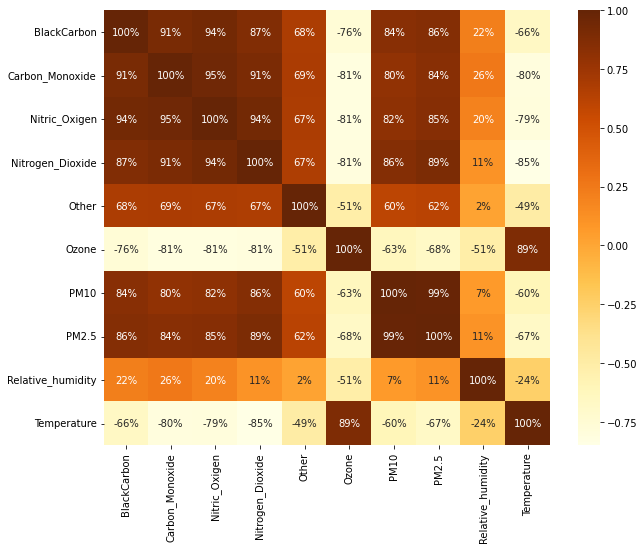

In [ ]:
sns.heatmap(df.corr(), annot=True, cmap='YlOrBr', fmt='.0%')
fig = plt.gcf()
fig.set_size_inches(10,8)
plt.show()

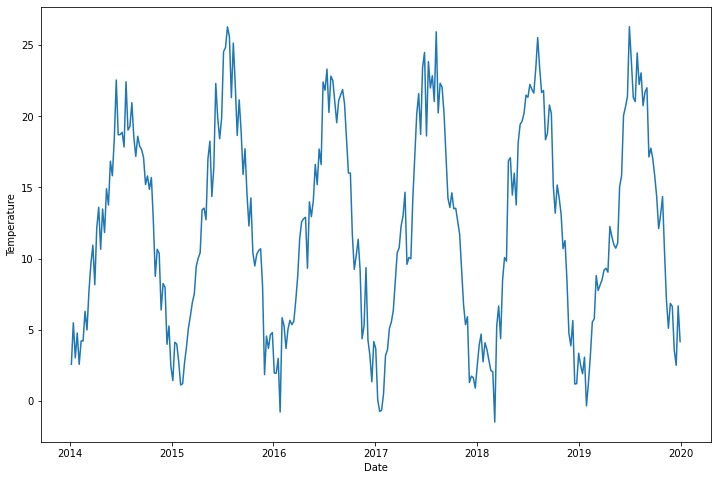

In [ ]:
#Plot --> noto estrema stagionalità sulla Temperatura chiaramente
plt.figure(figsize=(12,8))
sns.lineplot(data=df, x='Date', y= 'Temperature')

### Lasso

In statistica e in machine learning, il Lasso (operatore di restringimento e selezione minimo assoluto) è un metodo di analisi di regressione che esegue sia la selezione delle variabili che la regolarizzazione al fine di migliorare l'accuratezza della previsione e l'interpretabilità del modello statistico risultante.

In [ ]:
X = df.drop(['Date','Temperature'], axis=1)
X

,BlackCarbon,Carbon_Monoxide,Nitric_Oxigen,Nitrogen_Dioxide,Other,Ozone,PM10,PM2.5,Relative_humidity
0,4.940000,1.131926,86.343883,39.274285,3.079632,10.433822,39.816493,35.867097,88.612927
1,7.240000,1.262728,137.552704,44.407672,3.771451,8.085711,54.147144,42.487306,83.934511
2,4.585714,1.069887,104.035676,41.050989,3.183397,8.994553,31.279041,24.851380,91.254229
3,5.500000,0.980521,125.212004,43.558825,3.610101,16.541452,36.914636,27.714028,74.341920
4,3.642857,0.930767,91.325346,42.979772,3.125399,14.782626,36.176093,29.548442,87.962498
...,...,...,...,...,...,...,...,...,...
308,3.466667,0.714729,78.893047,32.958568,2.662906,11.360726,25.628122,19.451488,87.507713
309,2.850000,0.846985,106.568574,41.274109,2.987834,12.406892,40.740306,32.548546,78.335394
310,2.980000,0.825581,99.064946,44.437904,3.141001,15.285071,36.579938,30.130722,76.884068
311,3.557143,0.840518,95.077217,35.146074,2.861242,13.521588,29.002498,22.205184,94.809078


In [ ]:
Y = df.iloc[:,10]
Y

0      2.569692
1      5.487934
2      3.020901
3      4.766052
4      2.564018
         ...   
308    6.633415
309    3.547048
310    2.499465
311    6.673679
312    4.163620
Name: Temperature, Length: 313, dtype: float64

In [ ]:
# Create training and test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=42)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)
Alpha:1.00, R2:0.89, MSE:6.33, RMSE:2.52


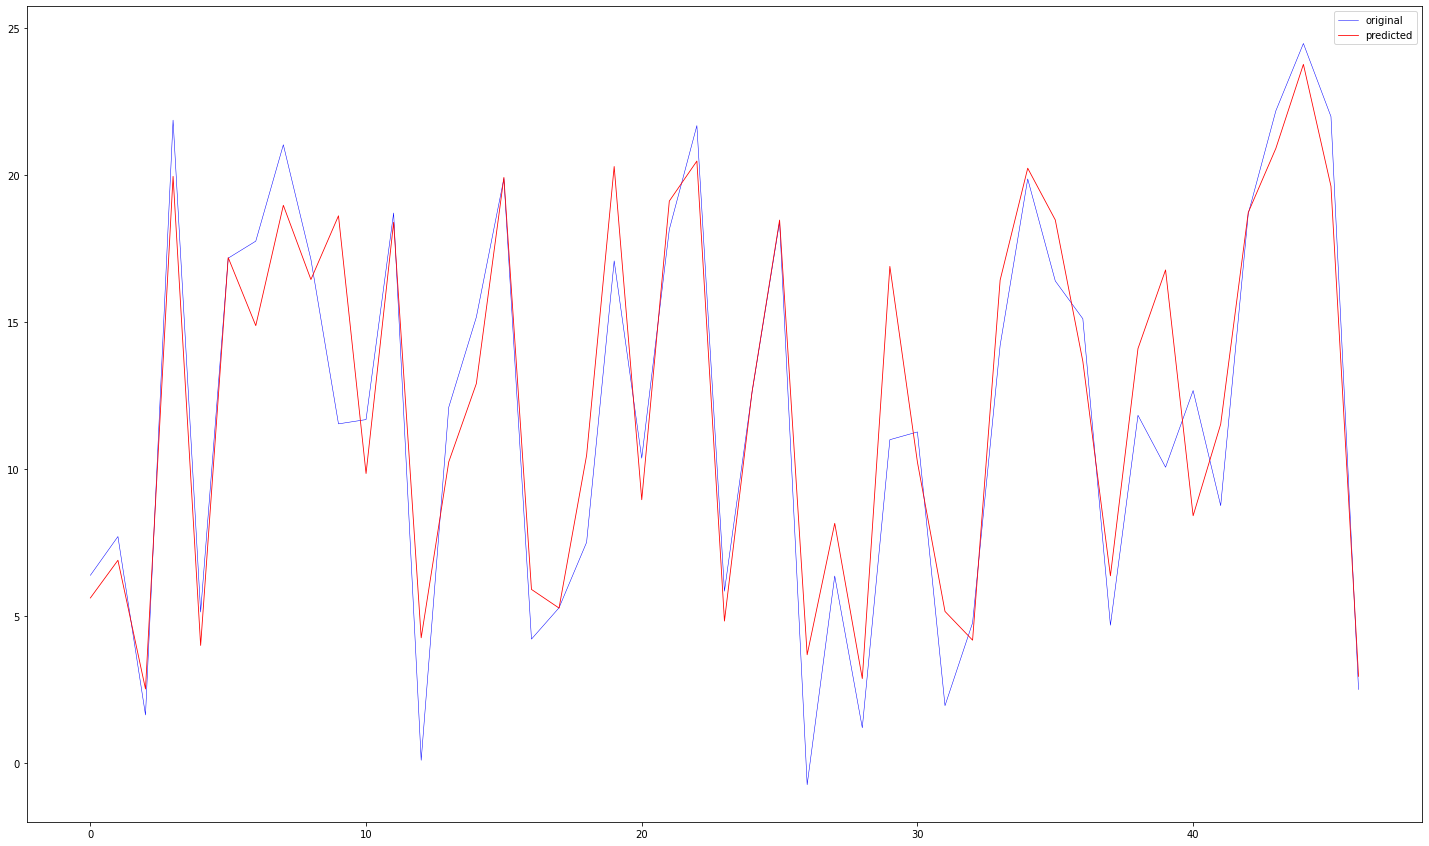

LassoCV(alphas=[0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1], copy_X=True, cv=5,
        eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=None,
        normalize=False, positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)
Alpha:0.01, R2:0.940, MSE:4.49, RMSE:2.12


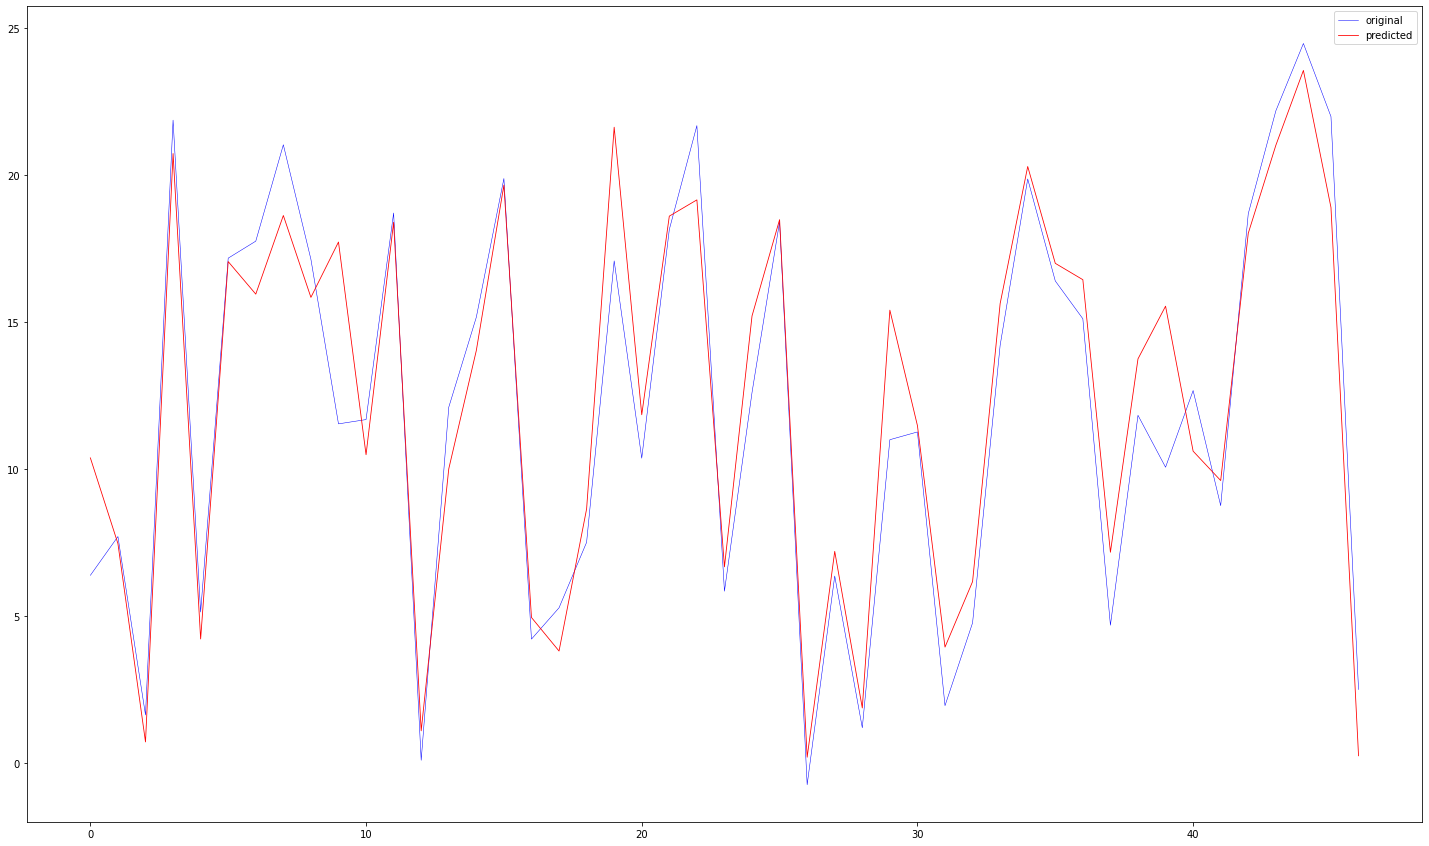

In [ ]:
## Lasso
model = Lasso().fit(X_train, y_train) 
print(model)
score = model.score(X, Y)
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Alpha:{0:.2f}, R2:{1:.2f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(model.alpha, score, mse, np.sqrt(mse)))

#plot test data
x_ax = range(len(y_pred))
plt.figure(figsize=(25,15))
plt.plot(x_ax, y_test, lw=0.5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

## Lasso with Cross-Validation
alphas = [0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1]
lassocv = LassoCV(alphas=alphas, cv=5).fit(X,Y)
print(lassocv)
score = lassocv.score(X,Y)
y_pred = lassocv.predict(X_test)
mse = mean_squared_error(y_test,y_pred)
print("Alpha:{0:.2f}, R2:{1:.3f}, MSE:{2:.2f}, RMSE:{3:.2f}"
    .format(lassocv.alpha_, score, mse, np.sqrt(mse)))

#plot test data 
x_ax = range(len(X_test))
plt.figure(figsize=(25,15))
plt.plot(x_ax, y_test, lw=0.5, color="blue", label="original")
plt.plot(x_ax, y_pred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

### Interpretazione coefficienti

Un coefficiente zero non indica alcuna relazione tra il predittore e la risposta, poiché zero moltiplicato per qualsiasi cosa è zero. Il lasso è speciale in quanto può ridurre a zero i coefficienti beta di alcuni predittori, eliminandoli di fatto dal modello.

In [ ]:
names=X.columns
names

Index(['BlackCarbon', 'Carbon_Monoxide', 'Nitric_Oxigen', 'Nitrogen_Dioxide',
       'Other', 'Ozone', 'PM10', 'PM2.5', 'Relative_humidity'],
      dtype='object')

In [ ]:
#ci sta dicendo che per l'ottimizzazione del Modello Lasso1 ha portato a 0 alcuni predittori: "BlackCarbon", "Carbon_Monoxide", "Other"
coeff1=model.coef_
coeff1

array([ 0.        , -0.        ,  0.02186265, -0.35534444,  0.        ,
        0.17935758,  0.20983741, -0.12779324,  0.10116501])

([<matplotlib.axis.XTick at 0x7f783c2834d0>,
 [Text(0, 0, 'BlackCarbon'),
  Text(0, 0, 'Carbon_Monoxide'),
  Text(0, 0, 'Nitric_Oxigen'),
  Text(0, 0, 'Nitrogen_Dioxide'),
  Text(0, 0, 'Other'),
  Text(0, 0, 'Ozone'),
  Text(0, 0, 'PM10'),
  Text(0, 0, 'PM2.5'),
  Text(0, 0, 'Relative_humidity')])

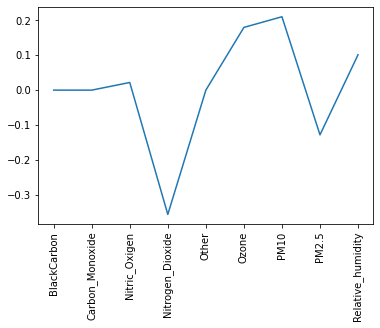

In [ ]:
plt.plot(range(len(names)),coeff1)
plt.xticks(range(len(names)),names, rotation=90)

In [ ]:
#Nel modello LassoCV sono stati utilizzati tutti i predittori con i seguenti "pesi"
coeff2=lassocv.coef_
coeff2

array([ 1.76746153, -4.05227388, -0.00969307, -0.30172259,  0.49717781,
        0.17688719,  0.6066359 , -0.71473681,  0.11704225])

([<matplotlib.axis.XTick at 0x7f783a09ca90>,
 [Text(0, 0, 'BlackCarbon'),
  Text(0, 0, 'Carbon_Monoxide'),
  Text(0, 0, 'Nitric_Oxigen'),
  Text(0, 0, 'Nitrogen_Dioxide'),
  Text(0, 0, 'Other'),
  Text(0, 0, 'Ozone'),
  Text(0, 0, 'PM10'),
  Text(0, 0, 'PM2.5'),
  Text(0, 0, 'Relative_humidity')])

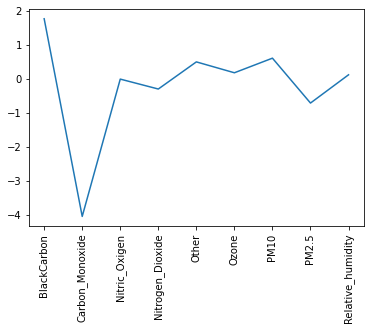

In [ ]:
plt.plot(range(len(names)),coeff2)
plt.xticks(range(len(names)),names, rotation=90)

### Best Alpha

### Significato

La regressione con lasso è una tecnica di modellazione comune per eseguire la regolarizzazione. La matematica alla base è piuttosto interessante.
La regressione Lasso viene fornita con un parametro, alpha. Più alto è alpha e più la maggior parte dei coefficienti assume valore zero.

Praticamente:

*   Quando alpha=0, allora nessuno dei coefficienti viene portato a 0 (in pratica stiamo dicendo che sono tutti significativi egualmente, perciò è come se fosse una REGRESSIONE LINEARE SEMPLICE)
*   Quando alpha è molto grande allora, tutti i coefficienti vengono portati a zero e alla fine abbiamo un MODELLO VUOTO.

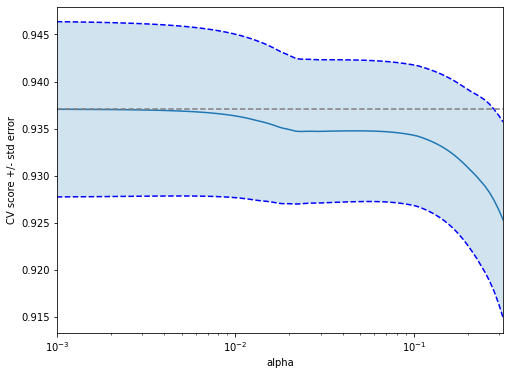

In [ ]:
lasso = Lasso(random_state=0, max_iter=10000)
alphas = np.logspace(-3, -0.5, 100)

tuned_parameters = [{"alpha": alphas}]
n_folds = 5

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, refit=False)
clf.fit(X_train, y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]
plt.figure().set_size_inches(8, 6)
plt.semilogx(alphas, scores)

# plot error lines showing +/- std. errors of the scores
std_error = scores_std / np.sqrt(n_folds)

plt.semilogx(alphas, scores + std_error, "b--")
plt.semilogx(alphas, scores - std_error, "b--")

# alpha=0.2 controls the translucency of the fill color
plt.fill_between(alphas, scores + std_error, scores - std_error, alpha=0.2)

plt.ylabel("CV score +/- std error")
plt.xlabel("alpha")
plt.axhline(np.max(scores), linestyle="--", color=".5")
plt.xlim([alphas[0], alphas[-1]])

plt.show()